# Leer imágenes en Pyhton

En este notebook, vamos a ver distintas formas para leer y mostrar imágenes en Python. En particular, vamos a introducir las siguientes librerías:

- PIL. 
- skimage.  
- openCV.
- matplotlib. 


In [3]:
%pip install Pillow 
%pip install scikit-image
%pip install opencv_python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Python Imaging Library (PIL)

Pillow es una librería de procesamiento y manipulación de imágenes. Se puede usar pillow para:
 - Recortar imágenes (crop). 
 - Cambiar su tamaño (resize). 
 - Filtrado básico.  


PNG
RGB
<class 'PIL.PngImagePlugin.PngImageFile'>
<class 'numpy.ndarray'>


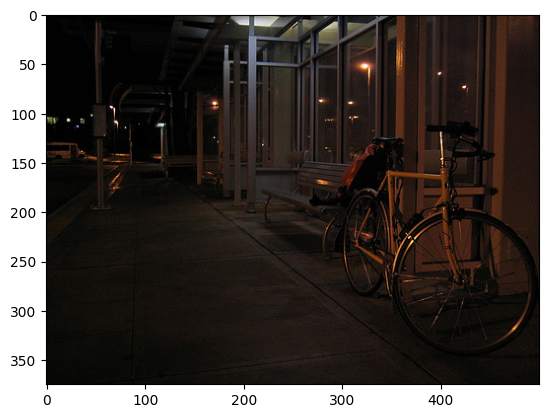

In [1]:
# to import the package you need to use import PIL

from PIL import Image 
import numpy as np       #Use numpy to convert images to arrays
from matplotlib import pyplot as plt

# Read image 
img = Image.open("./image1.png") #Not a numpy array

# prints format of image 
print(img.format) 
  
# prints mode of image 
print(img.mode) 

print(type(img))

#PIL is not by default numpy array but can convert PIL image to numpy array. 
img1 = np.asarray(img)
print(type(img1))


# Output Images 
plt.imshow(img1) 

# Using scikit image

- Para instalar scikit image, pip install scikit-image 
- Para importar la librería: import skimage
- scikit image es una librería de procesamiento de imagen que incluye algoritmos para: 
    - segmentacón, 
    - transformaciones geométricas
    - manipulación del espacio de color
    - analísis
    - filtrado
    - detección de características
    - etc. 

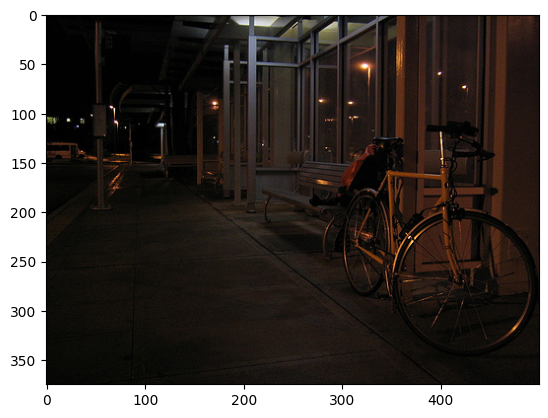

In [6]:
from skimage import io, img_as_float, img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt 


img = img_as_float(io.imread("./image1.png"))

#image2 = io.imread("images/test_image.jpg").astype(np.float)
#avoid using astype as it violates assumptions about dtype range.
#for example float should range from 0 to 1 (or -1 to 1) but if you use 
#astype to convert to float, the values do not lie between 0 and 1. 
#print(image.shape)
plt.imshow(img)

#print(image)

#print(image2)
#image8byte = img_as_ubyte(image)
#print(image8byte)

#End of Skimage

# Usando Matplotlib 

Matplotlib es una librerías para dibujar gráficos en python. Pyplot es un módulo de Matplotlib que proporciona un entorno similar a los gráficos en Matlab.

<class 'numpy.ndarray'>
(375, 500, 3)


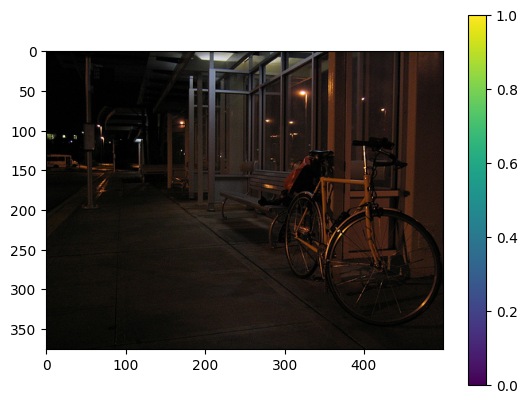

In [7]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

img = mpimg.imread("./image1.png")  #this is a numpy array
print(type(img))
print(img.shape)

plt.imshow(img)
plt.colorbar()   #Puts a color bar next to the image. 

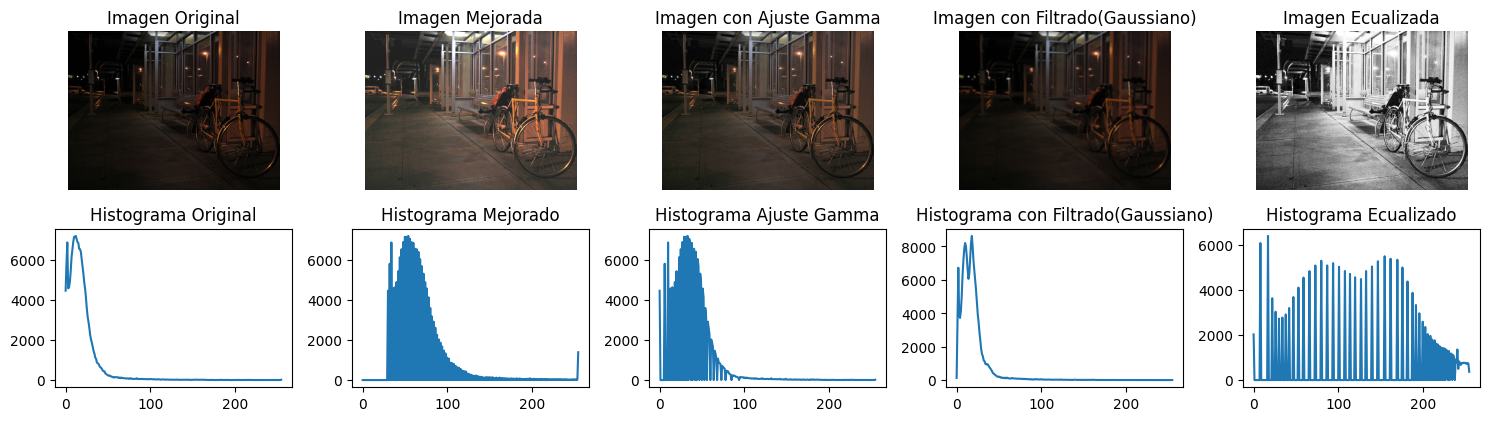

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar la imagen
imagen = cv2.imread('./image1.png')

# Aplicar ajuste de brillo y contraste
# Alpha controla el contraste y beta controla el brillo
imagen_mejorada = cv2.convertScaleAbs(imagen, alpha=2, beta=30)

# Función para ajuste gamma
def ajuste_gamma(imagen, gamma=1.0):
    inv_gamma = 1.0 / gamma
    tabla = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(imagen, tabla)

# Aplicar ajuste gamma a la imagen
gamma = 1.5
imagen_ajustada_gamma = ajuste_gamma(imagen, gamma)

# Aplicar filtro Gaussiano para eliminar ruido
imagen_filtrada = cv2.GaussianBlur(imagen, (5, 5), 0)

# Ecualización del histograma
imagen_ecualizada = cv2.equalizeHist(cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY))
histograma_ecualizado = cv2.calcHist([imagen_ecualizada], [0], None, [256], [0, 256])

# Calcular el histograma
histogramaOriginal = cv2.calcHist([imagen], [0], None, [256], [0, 256])
histogramaNuevo = cv2.calcHist([imagen_mejorada], [0], None, [256], [0, 256])
histogramaNuevo2 = cv2.calcHist([imagen_ajustada_gamma], [0], None, [256], [0, 256])
histogramaNuevo3 = cv2.calcHist([imagen_filtrada], [0], None, [256], [0, 256])

# Crear la figura y las subtramas
fig = plt.figure(figsize=(15, 10))

#Imagen Original y su histograma

plt.subplot(5, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(5, 5, 6)
plt.plot(histogramaOriginal)
plt.title('Histograma Original')

#Imagen Mejorada y su histograma

plt.subplot(5, 5, 2)
plt.imshow(cv2.cvtColor(imagen_mejorada, cv2.COLOR_BGR2RGB))
plt.title('Imagen Mejorada')
plt.axis('off')

plt.subplot(5, 5, 7)
plt.plot(histogramaNuevo)
plt.title('Histograma Mejorado')

#Imagen con Ajuste Gamma y su histograma

plt.subplot(5, 5, 3)
plt.imshow(cv2.cvtColor(imagen_ajustada_gamma, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Ajuste Gamma')
plt.axis('off')

plt.subplot(5, 5, 8)
plt.plot(histogramaNuevo2)
plt.title('Histograma Ajuste Gamma')

#Imagen con Filtrado(Gaussiano) y su histograma

plt.subplot(5, 5, 4)
plt.imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))
plt.title('Imagen con Filtrado(Gaussiano)')
plt.axis('off')

plt.subplot(5, 5, 9)
plt.plot(histogramaNuevo3)
plt.title('Histograma con Filtrado(Gaussiano)')


# Imagen ecualizada y su histograma
plt.subplot(5, 5, 5)
plt.imshow(imagen_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

plt.subplot(5, 5, 10)
plt.plot(histograma_ecualizado)
plt.title('Histograma Ecualizado')



# Ajustar el espacio entre las subtramas y mostrar la figura
plt.tight_layout()
plt.show()




## Using openCV


#openCV is a library of programming functions mainly aimed at computer vision.
#Very good for images and videos, especially real time videos.
#It is used extensively for facial recognition, object recognition, motion tracking,
#optical character recognition, segmentation, and even for artificial neural netwroks. 

You can import images in color, grey scale or unchanged usingindividual commands 
cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel
Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.

"""

In [3]:
#to install open CV : pip install opencv-python
#to import the package you need to use import cv2

import cv2

grey_img = cv2.imread("./image1.png", 0)
color_img = cv2.imread("./image1.png", 1)

#images opened using cv2 are numpy arrays
print(type(grey_img)) 
print(type(color_img)) 

# Use the function cv2.imshow() to display an image in a window. 
# First argument is the window name which is a string. second argument is our image. 

cv2.imshow("pic", grey_img)
cv2.imshow("color pic", color_img)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# Maintain output window until 
# user presses a key or 1000 ms (1s)
cv2.waitKey(0)          

#destroys all windows created
cv2.destroyAllWindows() 

#OpenCV imread, imwrite and imshow all work with the BGR order, not RGB
#but there is no need to change the order when you read an image with 
#cv2.imread and then want to show it with cv2.imshow
#if you use matplotlib, it uses RGB. 

import matplotlib.pyplot as plt
plt.imshow(color_img)  

#OpenCV represents RGB images as multi-dimensional NumPy arrays, but as BGR.

#we can convert the images from BGR to RGB
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))

#We can also change color spaces from RGB to HSV..
plt.imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV))

"""
###############################################################################
###########Reading OME-TIFF using apeer_ometiff_library ###########
# pip install apeer-ometiff-library first 
# to import the package you need to use import apeer_ometiff_library
#OME-TIFF has tiff and metada (as XML) embedded
#Image is a 5D array.
"""

from apeer_ometiff_library import io  #Use apeer.com free platform for image processing in the cloud

(pic2, omexml) = io.read_ometiff("images/test_image.ome.tif")  #Unwrap image and embedded xml metadata
print (pic2.shape)   #to verify the shape of the array
print(pic2)

print(omexml)

"""
####################################################################################
#reading czi files
# pip install czifile 
# to import the package you need to use import czifile
# https://pypi.org/project/czifile/
"""

import czifile

img = czifile.imread('images/test_image.czi')
print(img.shape)


import czifile
from skimage import io

img = czifile.imread('images/Osteosarcoma_01.czi')
print(img.shape)
img1=img[0, 0, :, :, :, 0]
print(img1.shape)
img2=img1[2,:,:]
io.imshow(img2)

"""
######################################################################################
### Reading multiple images from a folder
#The glob module finds all the path names 
#matching a specified pattern according to the rules used by the Unix shell
#The glob.glob returns the list of files with their full path 
"""

#import the library opencv
import cv2
import glob

#select the path
path = "images/test_images/aeroplane/*.*"
for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    a= cv2.imread(file)  #now, we can read each file since we have the full path
    print(a)  #print numpy arrays for each file

#let us look at each file
#    cv2.imshow('Original Image', a)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
    
#process each image - change color from BGR to RGB.
    c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    cv2.imshow('Color image', c)
#wait for 1 second
    k = cv2.waitKey(0)
#destroy the window
    cv2.destroyAllWindows()

#######################################################################################